Len of DataLoader 4
index=0,num=25
index=1,num=25
index=2,num=25
index=3,num=25
0.02017189934849739
w1:3.638868570327759
w2:0.8564028739929199
w3:-3.865535259246826
w4:1.587788701057434
b:-1.1431901454925537


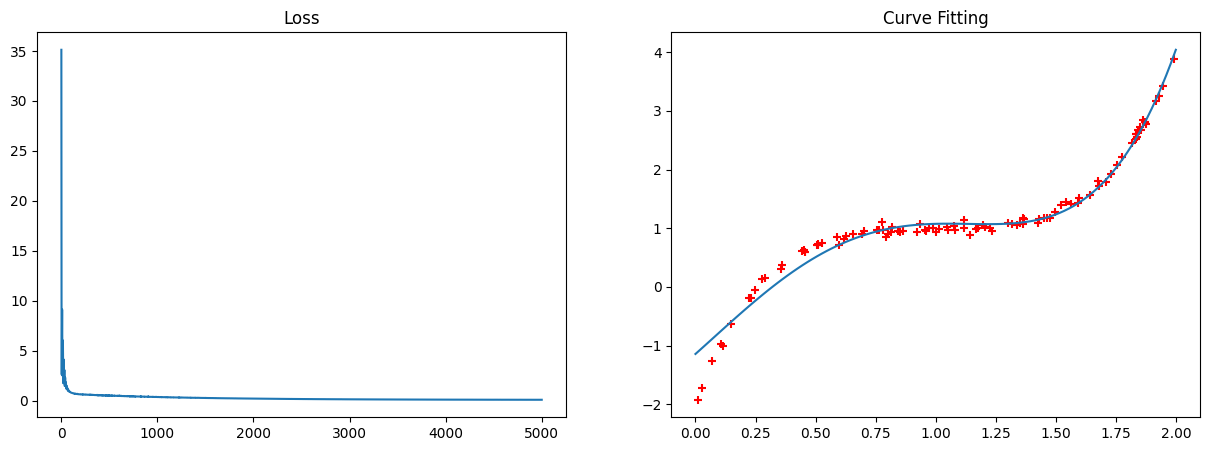

In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(50)
x = 2 * np.random.rand(100, 1)
y = 2*((x-1)**3)+(x-1)**5+1 + np.random.randn(100, 1) * 0.05
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()
dataset = TensorDataset(x, y)

dataloader = DataLoader(dataset, batch_size=25, shuffle=True)
print('Len of DataLoader', len(dataloader))

for index, (data, label) in enumerate(dataloader):
    print(f'index={index},num={len(data):2}')

epoch = 10000
lr = 0.008
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
w3 = torch.randn(1, requires_grad=True)
w4 = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

Loss = []

for epoch in range(1, epoch+1):
    sum_loss = 0
    for batch_id, (bx, by) in enumerate(dataloader):
        h = bx**4 * w4 + bx**3 * w3 + bx**2 * w2 + bx * w1 + b
        loss = torch.mean((h - by)**2)
        sum_loss += loss.item()
        loss.backward()
        w1.data -= lr * w1.grad.data
        w2.data -= lr * w2.grad.data
        w3.data -= lr * w3.grad.data
        w4.data -= lr * w4.grad.data
        b.data -= lr * b.grad.data
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        w4.grad.zero_()
    Loss.append(sum_loss)

print(loss.item())
print(f'w1:{w1.item()}')
print(f'w2:{w2.item()}')
print(f'w3:{w3.item()}')
print(f'w4:{w4.item()}')
print(f'b:{b.item()}')

Loss_x = [i for i in range(1, epoch+1)]
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(Loss_x, Loss)

w1 = w1.item()
w2 = w2.item()
w3 = w3.item()
w4 = w4.item()
b = b.item()
xx = np.linspace(0, 2, 100)
h = w4 * xx**4 + w3 * xx**3 + w2 * xx**2 + w1 * xx + b

plt.subplot(1, 2, 2)
plt.title("Curve Fitting")
plt.plot(xx, h)
plt.scatter(x, y, marker='+', color='red')
plt.show()